## Teste BB
### Dataset Census.csv
1. Coluna age: idade da pessoa que participou da avaliação de quanto ganha anualmente;

2. Coluna worclass: é qual o setor que a pessoa trabalha;

3. Coluna education_level: qual é o nível de instrução do usuário, segue abaixo os tipos que serão encontrados e válidos:

a. Bachelors;

b. Masters;

c. HS-grad;

d. Some-college;

e. Doctorate.

4. Coluna education_num: número da educação, é o processo de quantificar o nível educacional e dar um peso para seu identificador;

5. Coluna marital-status: o status de matrimônio do usuário que foi entrevistado;

6. Coluna occupation: ocupação do usuário que foi entrevistado, vale lembrar que essa variável pertence ao estado irregular;

7. Coluna relationship: é a coluna de relacionamento, onde detalha seu grau de relacionamento atual, segue as variáveis válidas:

a. Not-in-family;

b. Husband;

c. Wife;

d. Own-child;

e. Unmarried.

8. Coluna race: coluna que demonstra a tonalidade da pele do usuário, as variáveis válidas são:

a. White;

b. Black;

c. Asian-Pac-Islander;

d. Amer-Indian-Eskimo;

e. Other.

9. Coluna sex: o sexo da pessoa (Masculino ou Feminino);

10. Coluna capital-gain: capital ganho ou adquirido;

11. Coluna capital-loss: capital perdido ou não conquistado;

12. Coluna hours-per-week: horas por semana trabalhadas;

13. Coluna native-country: País nativo do usuário que foi entrevistado;

14. Coluna income: a renda anual do usuário que foi entrevistado, saídas:
a. Menos que 50k;
b. Menor e igual a 50k;
c. Maior que 50k.


## Saídas esperadas

Para este desafio esperamos algumas saídas necessárias, conforme abaixo (via TXT ou Markdown):

● Explicar as variáveis que foram exploradas e os motivos;

● Caso tenha sido necessário novas variáveis, explicar o motivo da criação;

● Explicar o processo de preparação;

● Detalhar se houve algum processo que deve ser considerado transformação de recursos contínuos enviesados e o porquê;

● Explicar qual foi o processo utilizado para normalização dos dados;

● Detalhar qual foi o modelo utilizado para desempenho e predição dos dados;

● Se chegou a utilizar Modelos de Aprendizagem Supervisionados, explique quais;

● Detalhar o que foi utilizado no treino e de evolução;

● Apresentar a acuracidade do modelo e a revalidação do modelo com Log Loss.

O arquivo gerado com as saídas solicitadas acima deve ser armazenados em seu repositório pessoal doGitHub.

## Import and initial parameters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import gc

import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
# Parametros de visualização de dados
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [12, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 16,\
   'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(style='dark',rc=rc)
default_color = '#56B4E9'
colormap = plt.cm.cool

## Loading files

In [3]:
df = pd.read_csv('census.csv')
df.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174.00,0.00,40.00,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00,0.00,13.00,United-States,<=50K


In [4]:
df.shape

(5533, 14)

In [5]:
#analyze outliers
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,5533.00,5533.00,5532.00,5532.00,5532.00
mean,38.45,10.11,1065.11,92.79,41.07
std,13.10,2.54,7251.50,409.63,11.62
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,47.00,13.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,2824.00,99.00


In [6]:
#analyze columns types and NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 14 columns):
age                5533 non-null int64
workclass          5533 non-null object
education_level    5533 non-null object
education-num      5533 non-null float64
marital-status     5533 non-null object
occupation         5533 non-null object
relationship       5533 non-null object
race               5533 non-null object
sex                5533 non-null object
capital-gain       5532 non-null float64
capital-loss       5532 non-null float64
hours-per-week     5532 non-null float64
native-country     5532 non-null object
income             5532 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 605.2+ KB


In [7]:
#confirm NAN
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     1
income             1
dtype: int64

In [8]:
#details NAN
df[df['capital-gain'].isnull()]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5532,29,Private,HS-grad,9.00,Married-civ-spouse,Prof-specialty,Husband,White,Mal,nan,nan,nan,NaN,NaN


### Target Analysis

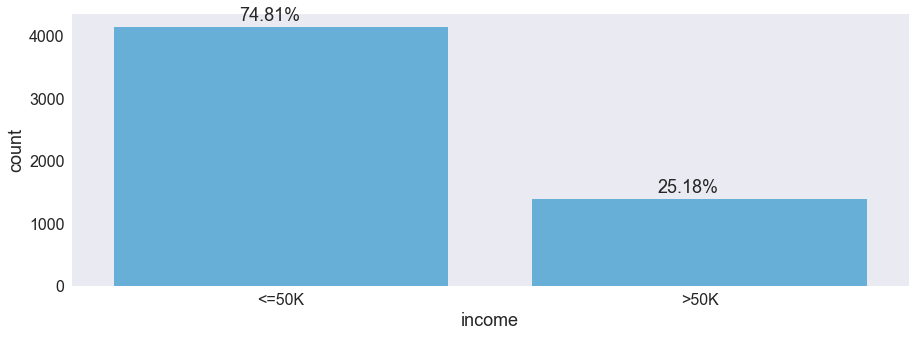

In [9]:
plt.figure(figsize=(15,5))
ax = sns.countplot('income',data=df,color=default_color)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df['income'])), (p.get_x()+ 0.3, p.get_height()+100))

In [10]:
#analyze frequency values per columns
for col in df.columns:
    print('columns:{}\ntype:{}\nqtd_unique: {}\nvalue_unique: {}\n'.format(col, df[col].dtype, df[col].nunique(),df[col].unique()  ))

columns:age
type:int64
qtd_unique: 67
value_unique: [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80]

columns:workclass
type:object
qtd_unique: 7
value_unique: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

columns:education_level
type:object
qtd_unique: 16
value_unique: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

columns:education-num
type:float64
qtd_unique: 16
value_unique: [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]

columns:marital-status
type:object
qtd_unique: 7
value_unique: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

colum

#### Nesta analise verificou-se que existem na coluna 'education_level', 16 frequência de valores, onde no enunciado do teste permite somente cinco variavéis váliddas – a. Bachelors; b. Masters; c. HS-grad; d. Some-college; e. Doctorate –, bem como, ocorre com a coluna relationship tendo uma variavel ('Other-relative'). 
#### Já a coluna 'sex' possui um possivel erro de digitação na variável('mal'), ocorre que este erro esta na mesma linha que contém 5 NAN,sendo descartado esta linha. Lamento que estas ocorrências tenham um custo alto para o Dataset, retirando 23,98% do total de dados.     

In [11]:
#mask of valid variables and elimination of invalid rows
mask1 = df['education_level'] == ' Bachelors'
mask2 = df['education_level'] == ' HS-grad'
mask3 = df['education_level'] == ' Masters'
mask4 = df['education_level'] == ' Some-college'
mask5 = df['education_level'] == ' Doctorate'
df = df[mask1 | mask2 | mask3 | mask4 | mask5]
df = df[df.relationship != ' Other-relative']

#### A coluna education_level poderá ser excluida porque possui a coluna education-num que possui os mesmo dados em formato ordinal.

In [12]:
# drop column education_level
df.drop('education_level', axis=1, inplace=True)

In [13]:
#changing the column types according to the variables of the values

df['workclass'] = df['workclass'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['education-num'] = df['education-num'].astype('int64')

#Encode the 'income' data to numerical values
df['income'] = df['income'].apply(lambda x: 1 if x == ">50K" else 0)

# Drop NAN lines
df.drop(5532, inplace= True)

## Data analisys

In [14]:
def get_meta(train):
    data = []
    for col in train.columns:
        # Defining the role
        if col == 'income':
            role = 'target'
        else:
            role = 'input'

        # Defining the level
        if col == 'income':
            level = 'binary'
        elif train[col].dtype == np.float64:
            level = 'interval'
        elif train[col].dtype == np.int64:
            level = 'ordinal'
        elif train[col].dtype == 'category':
            level = 'category'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = train[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [15]:
meta_data = get_meta(df)
meta_data

,role,level,keep,dtype
varname,,,,
age,input,ordinal,True,int64
workclass,input,category,True,category
education-num,input,ordinal,True,int64
marital-status,input,category,True,category
occupation,input,category,True,category
relationship,input,category,True,category
race,input,category,True,category
sex,input,category,True,category
capital-gain,input,interval,True,float64


In [16]:
#Group By DataType
meta_counts = meta_data.groupby(['role', 'level']).agg({'dtype': lambda x: x.count()}).reset_index()
meta_counts

,role,level,dtype
0,input,category,7
1,input,interval,3
2,input,ordinal,2
3,target,binary,1


[Text(0,0.5,'Count'),
 Text(0.5,0,'Variable Type'),
 Text(0.5,1,'Variables Count Across Datatype')]

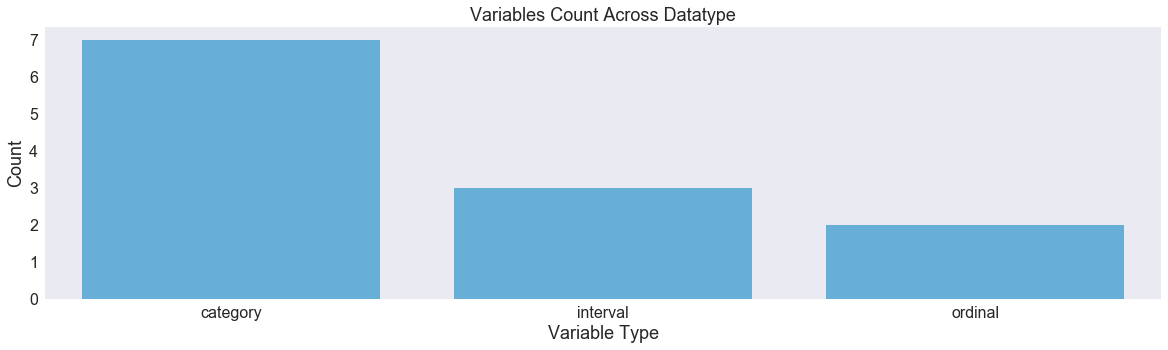

In [17]:
#plot Variables Count Across Datatype
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=meta_counts[(meta_counts.role != 'target')],x="level",y="dtype",ax=ax,color=default_color)
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

In [18]:
col_ordinal   = meta_data[(meta_data.level == 'ordinal') & (meta_data.keep)].index
col_category   = meta_data[(meta_data.level == 'category') & (meta_data.keep)].index
col_interval = meta_data[(meta_data.level == 'interval') & (meta_data.keep)].index

### Continuous features analysis

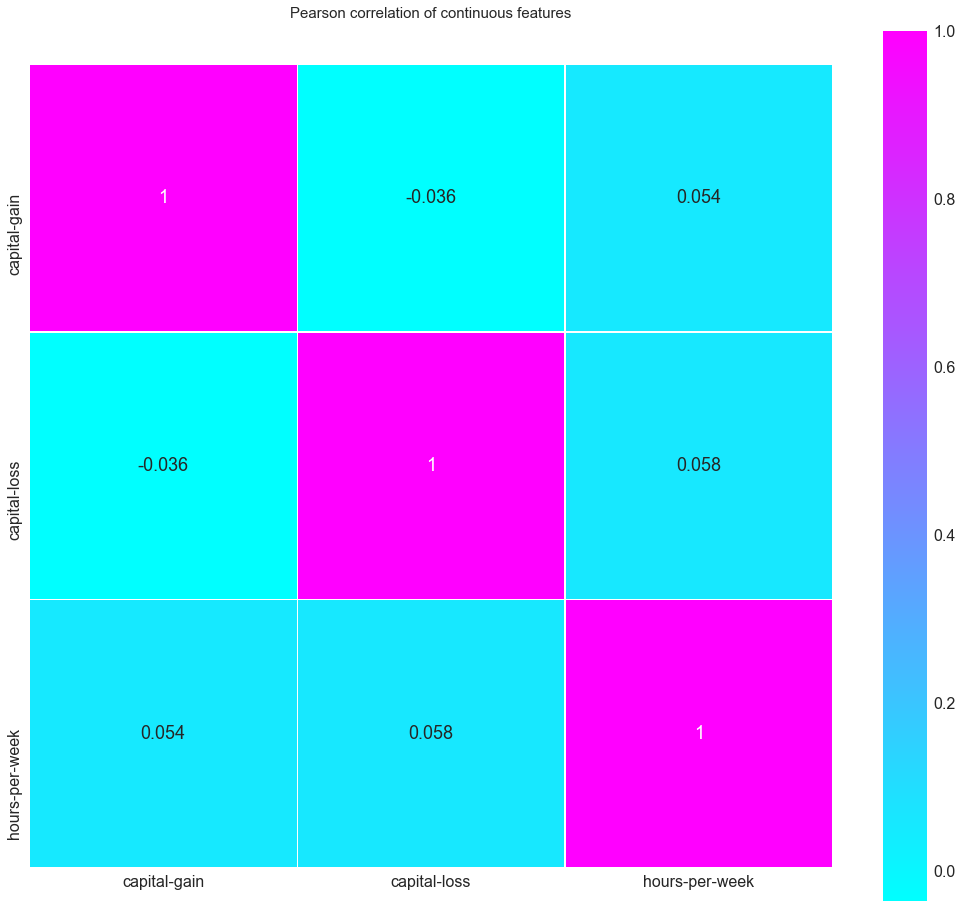

In [19]:
#Checking if there is continuous data that has a strong correlation with Person correlation
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df[col_interval].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Split the data into features and target


In [20]:
target = df['income']
previsores = df.drop('income', axis = 1)


#I created the variable features to test the importance of features with RandonForest
features = df.drop('income', axis = 1)

In [21]:

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#previsores[col_ordinal] = scaler.fit_transform(df[col_ordinal])
previsores[col_interval] = scaler.fit_transform(df[col_interval])
features[col_interval] = scaler.fit_transform(df[col_interval])

In [22]:
#LabelEncoder to prepare the cathegorical data in formats accepted by the algorithms
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_previsores = LabelEncoder()
for col in col_category:
    features[col] = labelencoder_previsores.fit_transform(features[col])
    previsores[col] = labelencoder_previsores.fit_transform(previsores[col])

In [23]:
previsores.head(1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,13,4,0,1,4,1,0.02,0.00,0.40,35


### Testing feature importantes with Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(features, target)
features_importantes = features.columns.values
print("----- Training Done -----")

----- Training Done -----


In [25]:
def get_feature_importance_df(feature_importances, 
                              column_names, 
                              top_n=25):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame
 
    """
     
    imp_dict = dict(zip(column_names, 
                        feature_importances))
    top_features = sorted(imp_dict, 
                          key=imp_dict.get, 
                          reverse=True)[0:top_n]
    top_importances = [imp_dict[feature] for feature 
                          in top_features]
    df = pd.DataFrame(data={'feature': top_features, 
                            'importance': top_importances})
    return df

In [26]:
feature_importance = get_feature_importance_df(rf.feature_importances_, features_importantes)

[Text(0,0.5,'Importance'),
 Text(0.5,0,'Variable name'),
 Text(0.5,1,'Variable importances')]

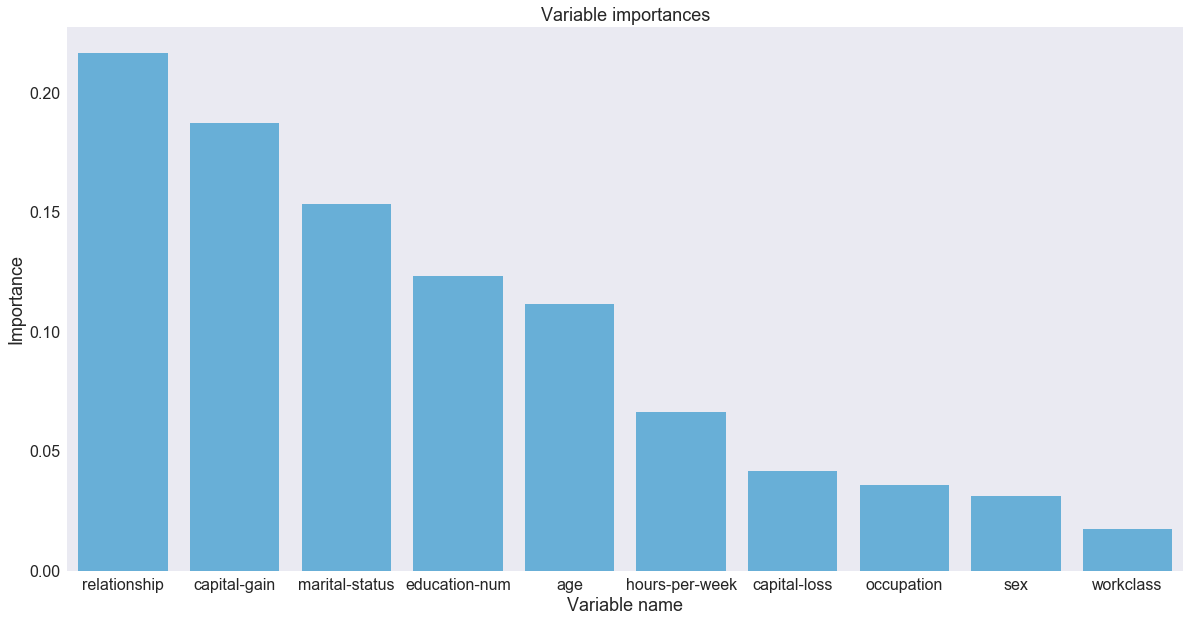

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10],x="feature",y="importance",ax=ax,color=default_color,)
ax.set(xlabel='Variable name', ylabel='Importance',title="Variable importances")

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(previsores, target, test_size = 0.2, random_state = 0)
X_train.shape
X_test.shape
print('Train: {}\nTest:{}'.format(len(X_train), len(X_test)))

Train: 3364
Test:842


In [29]:
from sklearn.metrics import  accuracy_score, log_loss

def avaliacao(y_test, previ , pred_proba):
    
    precisao = accuracy_score(y_test, previ)
    print('accuracy: {}\n'.format(precisao))
    print('Log_loss: {}\n\n'.format(log_loss(y_test,pred_proba)))

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras_tqdm import TQDMNotebookCallback
from sklearn.svm import SVC
from xgboost import XGBClassifier

def treinamento(X_train, X_test, y_train, y_test, alg):
    
    
    def a_naivebayes(X_train, X_test, y_train, y_test):
        classificador = GaussianNB()
        classificador.fit(X_train, y_train)
        previsoes = classificador.predict(X_test)
        pred_proba = classificador.predict_proba(X_test)
        print('Naive Bayes')
        avaliacao(y_test, previsoes, pred_proba)
        
    def a_knn(X_train, X_test, y_train, y_test):
        classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
        classificador.fit(X_train, y_train)
        previsoes = classificador.predict(X_test)
        pred_proba = classificador.predict_proba(X_test)
        print('KNN')
        avaliacao(y_test, previsoes, pred_proba)
        
    def a_rf(X_train, X_test, y_train, y_test):
        
        rf_params = {}
        rf_params['n_estimators'] = 200
        rf_params['random_state'] = 0
        rf_params['criterion'] = 'entropy'
        rf_params['max_depth'] = 6
        rf_params['min_samples_split'] = 70
        rf_params['min_samples_leaf'] = 30
        classificador = RandomForestClassifier(**rf_params)
        classificador.fit(X_train, y_train)
        previsoes = classificador.predict(X_test)
        pred_proba = classificador.predict_proba(X_test)
        print('RandomForest')
        avaliacao(y_test, previsoes, pred_proba)
        
    def a_lr(X_train, X_test, y_train, y_test):
        classificador = LogisticRegression()
        classificador.fit(X_train, y_train)
        previsoes = classificador.predict(X_test)
        pred_proba = classificador.predict_proba(X_test)
        print('LogisticRegression')
        avaliacao(y_test, previsoes, pred_proba)
    
    def a_svm(X_train, X_test, y_train, y_test):
        classificador = SVC(kernel = 'linear', random_state = 1, probability= True)
        classificador.fit(X_train, y_train)
        previsoes = classificador.predict(X_test)
        pred_proba = classificador.predict_proba(X_test)
        print('SVM')
        avaliacao(y_test, previsoes, pred_proba)
        
    def a_keras(X_train, X_test, y_train, y_test):
        classificador = Sequential()
        classificador.add(Dense(units = round((X_train.shape[1]+1)/2), activation = 'relu', input_dim = X_train.shape[1]))
        classificador.add(Dense(units = round((X_train.shape[1]+1)/2), activation = 'relu'))
        classificador.add(Dense(units = 21, activation = 'relu'))
        classificador.add(Dense(units = 1, activation = 'sigmoid'))
        classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        #print(classificador.summary())


        classificador.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose=0, callbacks=[TQDMNotebookCallback()])

        previsoes = classificador.predict(X_test)
        previsoes = (previsoes > 0.5)
        pred_proba = classificador.predict_proba(X_test)
        pred_proba = pred_proba.astype(np.float64)


        print('NeuralNetwork Keras')
        avaliacao(y_test, previsoes, pred_proba)
        
    def a_xgb(X_train, X_test, y_train, y_test):
        
        # XGBoost params# XGBoos 
        xgb_params = {}
        xgb_params['learning_rate'] = 0.02
        xgb_params['n_estimators'] = 1000
        xgb_params['max_depth'] = 4
        xgb_params['subsample'] = 0.9
        xgb_params['colsample_bytree'] = 0.9
        classificador = XGBClassifier(**xgb_params)
        classificador.fit(X_train, y_train)
        previsoes = classificador.predict(X_test)
        pred_proba = classificador.predict_proba(X_test)
        print('XGBoost')
        avaliacao(y_test, previsoes, pred_proba)
        

    if alg == 'naive_bayes':
        a_naivebayes(X_train, X_test, y_train, y_test)
    elif alg == 'knn':
        a_knn(X_train, X_test, y_train, y_test)
    elif alg == 'rf':
        a_rf(X_train, X_test, y_train, y_test)        
    elif alg == 'lr':
        a_lr(X_train, X_test, y_train, y_test)
    elif alg == 'svm':
        a_svm(X_train, X_test, y_train, y_test)
    elif alg == 'keras':
        a_keras(X_train, X_test, y_train, y_test)
    elif alg == 'xgb':
        a_xgb(X_train, X_test, y_train, y_test)
    elif alg == 'all':
        a_naivebayes(X_train, X_test, y_train, y_test)
        a_knn(X_train, X_test, y_train, y_test)
        a_rf(X_train, X_test, y_train, y_test)
        a_lr(X_train, X_test, y_train, y_test)
        a_keras(X_train, X_test, y_train, y_test)
        a_xgb(X_train, X_test, y_train, y_test)
        a_svm(X_train, X_test, y_train, y_test)
        

/Users/eduardoquadros/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Resultados realizando a limpeza de dados, escalonando as variaveis no dataset, com excessão das target e das colunas com types ordinais.

In [31]:
treinamento(X_train, X_test, y_train, y_test, 'all')

Naive Bayes
accuracy: 0.7755344418052257

Log_loss: 0.8448387043647315


KNN
accuracy: 0.7351543942992874

Log_loss: 1.6499625579148174


RandomForest
accuracy: 0.7992874109263658

Log_loss: 0.39656537762251526


LogisticRegression
accuracy: 0.7648456057007126

Log_loss: 0.4944409665293562





NeuralNetwork Keras
accuracy: 0.7945368171021377

Log_loss: 0.4278727345390083




/Users/eduardoquadros/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBoost
accuracy: 0.832541567695962

Log_loss: 0.34077230518316504


SVM
accuracy: 0.7731591448931117

Log_loss: 0.48146906115596944




## Feature Engineering


#### One-hot Encoding effect


In [32]:
gc.collect()

target = df['income']
previsores = df.drop('income', axis = 1)
previsores[col_interval] = scaler.fit_transform(df[col_interval])
previsores = pd.get_dummies(previsores)
print("total features after one-hot: {}".format(len(list(previsores.columns))))

X_train, X_test, y_train, y_test = train_test_split(previsores, target, test_size = 0.2, random_state = 0)
X_train.shape
X_test.shape
print('Train: {}\nTest:{}'.format(len(X_train), len(X_test)))
previsores.head(1)

total features after one-hot: 83
Train: 3364
Test:842


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,0.02,0.00,0.40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
treinamento(X_train, X_test, y_train, y_test, 'all')

Naive Bayes
accuracy: 0.4524940617577197

Log_loss: 16.86875696669395


KNN
accuracy: 0.7541567695961995

Log_loss: 1.7190415455559125


RandomForest
accuracy: 0.7945368171021377

Log_loss: 0.4191325186618585


LogisticRegression
accuracy: 0.7921615201900237

Log_loss: 0.4061965704033903





NeuralNetwork Keras
accuracy: 0.7969121140142518

Log_loss: 0.4870076240902428




/Users/eduardoquadros/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBoost
accuracy: 0.831353919239905

Log_loss: 0.3445993785078701


SVM
accuracy: 0.7921615201900237

Log_loss: 0.4142309507480343




## Extra features effect


### Extra Features

In [34]:
gc.collect()

target = df['income']
previsores = df.drop('income', axis = 1)
#previsores['bin_sum']  = previsores[col_category].sum(axis=1)
previsores['ord_sum']  = previsores[col_ordinal].sum(axis=1)
previsores['intenval_median']  = previsores[col_interval].sum(axis=1)

previsores[col_interval] = scaler.fit_transform(df[col_interval])
previsores = pd.get_dummies(previsores)
print("total features after one-hot: {}".format(len(list(previsores.columns))))

X_train, X_test, y_train, y_test = train_test_split(previsores, target, test_size = 0.2, random_state = 0)
X_train.shape
X_test.shape
print('Train: {}\nTest:{}'.format(len(X_train), len(X_test)))
previsores.head(1)



total features after one-hot: 85
Train: 3364
Test:842


,age,education-num,capital-gain,capital-loss,hours-per-week,ord_sum,intenval_median,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,0.02,0.00,0.40,52,2214.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
treinamento(X_train, X_test, y_train, y_test, 'all')

Naive Bayes
accuracy: 0.7553444180522565

Log_loss: 1.1772505401039122


KNN
accuracy: 0.7707838479809976

Log_loss: 1.4946824028403476


RandomForest
accuracy: 0.8004750593824228

Log_loss: 0.40456072681821387


LogisticRegression
accuracy: 0.8135391923990499

Log_loss: 0.38364689416450554





NeuralNetwork Keras
accuracy: 0.7482185273159145

Log_loss: 3.3030618119366015




/Users/eduardoquadros/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBoost
accuracy: 0.831353919239905

Log_loss: 0.3461598818425923


